In [60]:
import pandas as pd
import matplotlib.animation
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# sns.palplot(sns.color_palette("Set2", 10))
sns.set_palette("Set2", 11)

In [2]:
char_df = pd.read_csv('crazy.csv')

In [3]:
del char_df['Unnamed: 0']

In [36]:
char_df.head()

,analeigh_tipton,beth_littleford,emma_stone,joey_king,john_carroll_lynch,jonah_bobo,julianne_moore,kevin_bacon,marisa_tomei,ryan_gosling,...,avg_avg_beth_littleford,avg_avg_emma_stone,avg_avg_joey_king,avg_avg_john_carroll_lynch,avg_avg_jonah_bobo,avg_avg_julianne_moore,avg_avg_kevin_bacon,avg_avg_marisa_tomei,avg_avg_ryan_gosling,avg_avg_steve_carell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
char_df.columns

Index(['analeigh_tipton', 'beth_littleford', 'emma_stone', 'joey_king',
       'john_carroll_lynch', 'jonah_bobo', 'julianne_moore', 'kevin_bacon',
       'marisa_tomei', 'ryan_gosling', 'steve_carell', 'avg_analeigh_tipton',
       'avg_beth_littleford', 'avg_emma_stone', 'avg_joey_king',
       'avg_john_carroll_lynch', 'avg_jonah_bobo', 'avg_julianne_moore',
       'avg_kevin_bacon', 'avg_marisa_tomei', 'avg_ryan_gosling',
       'avg_steve_carell'],
      dtype='object')

In [43]:
#remove all columns except original
def delete_new_columns(df, num_char):
    for i in range (len(char_df.columns) - num_char):
        char_df.drop(char_df.columns[[num_char]], axis=1, inplace=True) 

In [5]:
def get_frame_count(row, charname, window):
    global appear_list
    if (len(appear_list) >= window):
        appear_list.pop(0)
    appear_list.append(row[charname])
    return sum(appear_list)

In [44]:
def create_avg_column(df, window):
    appear_list = []
    for column in df:
        appear_list = []
        avg_column = "avg_" + column
        df[avg_column] = df.apply(lambda row: get_frame_count(row, column, window), axis = 1)

In [54]:
delete_new_columns(char_df, 11)

In [55]:
create_avg_column(char_df, 100)

In [56]:
char_df.head()

,analeigh_tipton,beth_littleford,emma_stone,joey_king,john_carroll_lynch,jonah_bobo,julianne_moore,kevin_bacon,marisa_tomei,ryan_gosling,...,avg_beth_littleford,avg_emma_stone,avg_joey_king,avg_john_carroll_lynch,avg_jonah_bobo,avg_julianne_moore,avg_kevin_bacon,avg_marisa_tomei,avg_ryan_gosling,avg_steve_carell
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,38,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,38,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,37,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,36,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,15,36,0,0,0


In [76]:
for column in char_df:
    if ('avg_' in column):
        char_df[column].plot(label=column[4:])

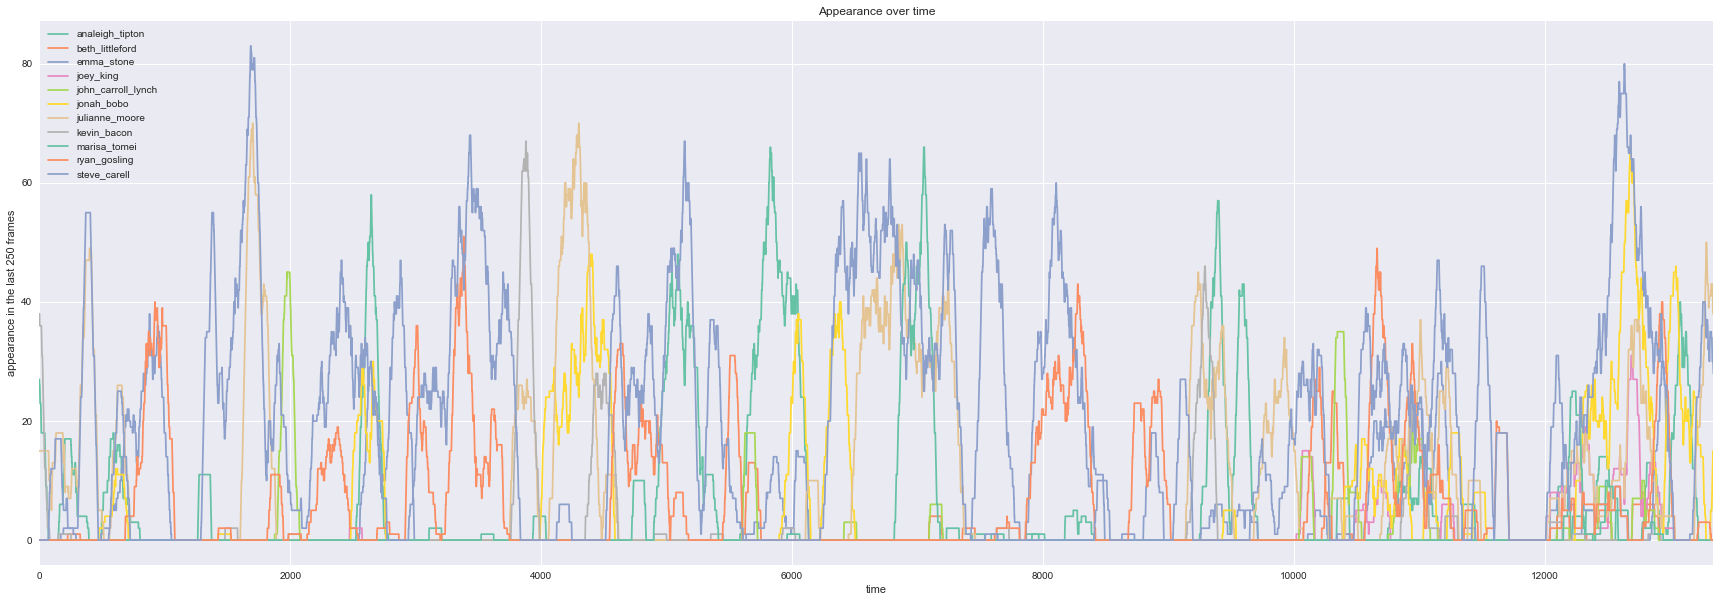

In [77]:
legend = plt.legend(loc='best')
frame = legend.get_frame()
frame.set_facecolor('0.90')

fig = plt.gcf()
fig.set_size_inches(30, 10)

plt.xlabel('time')
plt.ylabel('appearance in the last 250 frames')
plt.title('Appearance over time')
plt.show()

In [78]:
fig.savefig('output.png', dpi=100)

In [79]:
len(char_df)

13345